This notebook contains code related to inspection and pre-processing of scrapped images.

In [6]:
IMAGES_DIR = '../../data/raw/aarong_all_images'

In [7]:
from dotenv import load_dotenv

load_dotenv()

True

In [8]:
import os
import mysql.connector

conn = mysql.connector.connect(host=os.getenv("MYSQL_HOST") , user=os.getenv("MYSQL_USER"), password=os.getenv("MYSQL_PASSWORD"), database=os.getenv("MYSQL_DB"), auth_plugin='mysql_native_password')

cursor = conn.cursor()

In [9]:
import json

query = """
SELECT p.id, p.product_name, p.product_price, p.product_link, p.product_default_image, r.details
FROM products p
JOIN raw_details r ON p.id = r.product_id
WHERE p.processing_status = 'processed' AND r.is_image_downloaded = 1
LIMIT 1;
"""

cursor.execute(query)

results = cursor.fetchall()

for row in results:
	product_id = row[0]
	product_name = row[1]
	product_price = row[2]
	product_link = row[3]
	product_default_image = row[4]
	details = row[5]

	print(f"Product ID: {product_id}")
	print(f"Product Name: {product_name}")
	print(f"Product Price: {product_price}")
	print(f"Product Link: {product_link}")
	print(f"Product Default Image: {product_default_image}")
	details_json = json.loads(details)
	print(f"Details: {json.dumps(details_json, indent=4)}")
	print("\n")

Product ID: 1
Product Name: White Printed and Embroidered Cotton Saree
Product Price: Tk 3,418.60
Product Link: https://www.aarong.com/catalog/product/view/id/2582605/s/white-printed-and-embroidered-cotton-saree-0560000072957/category/77/
Product Default Image: https://www.aarong.com/media/catalog/product/0/5/0560000072957.jpg
Details: {
    "sku": "SKU#: 0560000072957",
    "price": "Tk 3,418.60",
    "specs": {
        "Care": "Hand Wash With Mild Detergent In Cold Water And Starch",
        "Blouse": "With Blouse Piece",
        "Colour": "White",
        "Fabric": "Cotton",
        "Aanchal": "Patterned Aanchal",
        "Value Addition": "Hand Embroidery"
    },
    "title": "White Printed and Embroidered Cotton Saree",
    "images": [
        "https://www.aarong.com/media/catalog/product/0/5/0560000072957.jpg?optimize=high&bg-color=255,255,255&fit=bounds&height=667&width=500&canvas=500:667",
        "https://www.aarong.com/media/catalog/product/0/5/0560000072957_2.jpg?optimize=hi

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def resolve_local_image_path(image_url, image_dir):
	# url "https://www.aarong.com/media/catalog/product/0/5/0560000072957_1.jpg?optimize=high&bg-color=255,255,255&fit=bounds&height=667&width=500&canvas=500:667"
	# resolved as f"{image_dir}/0560000072957_1.jpg"
	image_name = image_url.split("/")[-1].split("?")[0]
	return f"{image_dir}/{image_name}"

def get_product(product_id):
	query = """
	SELECT p.id, p.product_name, p.product_price, p.product_link, p.product_default_image, r.details
	FROM products p
	JOIN raw_details r ON p.id = r.product_id
	WHERE p.id = %s AND p.processing_status = 'processed' AND r.is_image_downloaded = 1;
	"""
	cursor.execute(query, (product_id,))
	result = cursor.fetchone()
	
	if result:
		product = {
			"id": result[0],
			"name": result[1],
			"price": result[2],
			"link": result[3],
			"default_image": result[4],
			"details": json.loads(result[5])
		}

		product['local_images'] = [resolve_local_image_path(img, IMAGES_DIR) for img in product['details'].get('images', [])]
		return product
	else:
		return None

def plot_product_images(label, images):
	fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
	if len(images) == 1:
		axes = [axes]

	for ax, img_file in zip(axes, images):
		img = mpimg.imread(img_file)
		ax.imshow(img)
		ax.axis('off')
		ax.set_title(label)
	plt.tight_layout()
	plt.show()

def show_product(product_id, print_details=False):
	product = get_product(product_id)
	if product:
		if print_details:
			print(json.dumps(product, indent=4))
		
		plot_product_images(product['name'] + ' - ' + str(product_id), product['local_images'])

	else:
		print(f"No product found with ID {product_id}")

{
    "id": 17,
    "name": "Brown Printed And Embroidered Cotton Saree",
    "price": "Tk 2,930.23",
    "link": "https://www.aarong.com/catalog/product/view/id/2453300/s/brown-printed-and-embroidered-cotton-saree-0560000070996/category/77/",
    "default_image": "https://www.aarong.com/media/catalog/product/0/5/0560000070996.jpg",
    "details": {
        "sku": "SKU#: 0560000070996",
        "price": "Tk 2,930.23",
        "specs": {
            "Care": "Hand Wash With Mild Detergent In Cold Water And Starch",
            "Blouse": "With Blouse Piece",
            "Colour": "Brown",
            "Fabric": "Cotton",
            "Aanchal": "Patterned Aanchal",
            "Value Addition": "Hand Embroidery"
        },
        "title": "Brown Printed And Embroidered Cotton Saree",
        "images": [
            "https://www.aarong.com/media/catalog/product/0/5/0560000070996.jpg?optimize=high&bg-color=255,255,255&fit=bounds&height=667&width=500&canvas=500:667",
            "https://www.

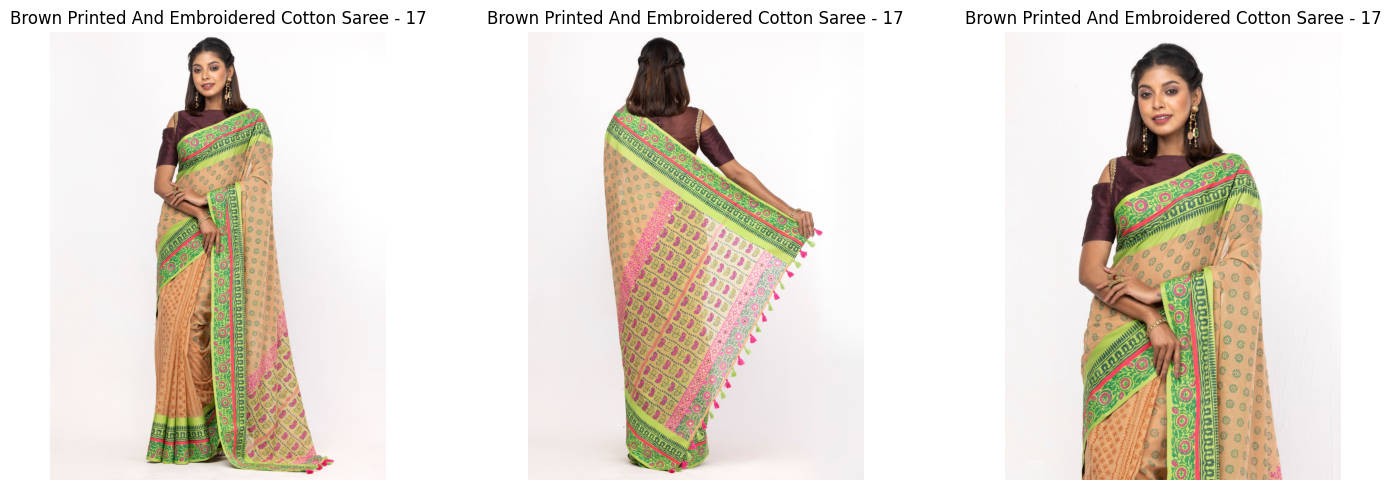

In [59]:
items = [17]

for item in items:
	show_product(item, print_details=True)